### Author: Elsie Lin
### Dataset: Global Terrorism Database
#### Dataset Source: https://www.start.umd.edu/gtd/about/
#### Dataset Download link: https://www.kaggle.com/START-UMD/gtd

In [402]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from scipy import signal

In [376]:
Te = pd.read_csv("Global Terrorism 1970-2017.csv",encoding='latin-1')

In [377]:
Te.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country_txt',
       'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'success',
       'suicide', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1_txt', 'gname', 'motive', 'weaptype1_txt',
       'weapsubtype1_txt', 'weapdetail', 'nkill', 'nkillus', 'nkillter',
       'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent',
       'propextent_txt', 'propvalue', 'propcomment', 'ishostkid'],
      dtype='object')

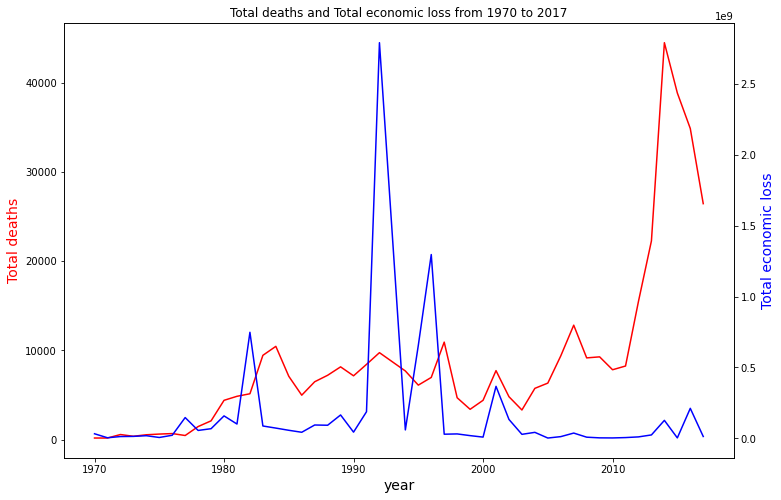

In [378]:
# Relationship between year and number of total kill
A = Te.groupby("iyear", as_index = False)["nkill"].sum()

# Relationship between year and property loss values
B = Te.groupby("iyear", as_index = False)["propvalue"].sum()

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(A.iyear, A.nkill, color="red")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Total deaths",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(B.iyear, B.propvalue,color="blue")
ax2.set_ylabel("Total economic loss",color="blue",fontsize=14)
plt.title("Total deaths and Total economic loss from 1970 to 2017")
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

In [379]:
# Know more about the economic loss type
ec_l_type = np.unique(Te["propextent"].dropna())
print("The economic loss extent type code:")
print(ec_l_type)
ec_l_type_txt = [list(Te["propextent_txt"].loc[Te["propextent"]==ec_l_type[0]].unique()),
                 list(Te["propextent_txt"].loc[Te["propextent"]==ec_l_type[1]].unique()),
                 list(Te["propextent_txt"].loc[Te["propextent"]==ec_l_type[2]].unique()),
                 list(Te["propextent_txt"].loc[Te["propextent"]==ec_l_type[3]].unique())
                ]
print("The economic loss extent type:")
print(ec_l_type_txt)

The economic loss extent type code:
[1. 2. 3. 4.]
The economic loss extent type:
[['Catastrophic (likely >= $1 billion)'], ['Major (likely >= $1 million but < $1 billion)'], ['Minor (likely < $1 million)'], ['Unknown']]


In [380]:
# Select the events with most economic loss
# We choose the first two extent: Catastrophic (likely >= $1 billion), Major (likely >= $1 million but < $1 billion)
# The number of events which have catastrophic and major economic loss
number_C_Major = Te["eventid"].loc[(Te["propextent"]==1) | (Te["propextent"]==2)].count()
print("The number of events which have 'catastrophic' and 'major' economic loss：")
print(number_C_Major)

The number of events which have 'catastrophic' and 'major' economic loss：
915


Text(0.5, 1.0, 'Distribution of weapon use in the subset of peak economic loss and peak deaths')

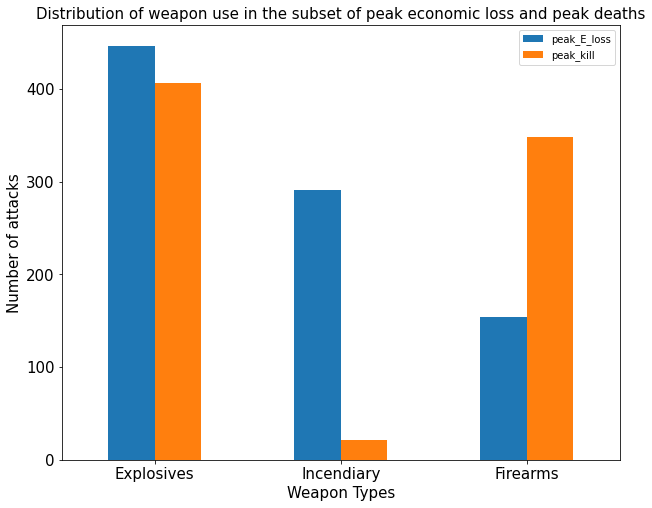

In [381]:
# Sort out the event that has large propvalue
Big_propvalue = Te.sort_values(by=["propvalue"],ascending=False).head(number_C_Major)

# Sort out the event that has large nkill
Big_nkill = Te.sort_values(by=["nkill"],ascending=False).head(number_C_Major)

weapcount_prop = Big_propvalue.groupby("weaptype1_txt")['eventid'].count().reset_index(name='peak_E_loss').sort_values(['peak_E_loss'], ascending=False).head(3)
weapcount_kill = Big_nkill.groupby("weaptype1_txt")['eventid'].count().reset_index(name='peak_kill').sort_values(['peak_kill'], ascending=False).head(5)
merged_p_k = weapcount_prop.merge(weapcount_kill, how='left', on='weaptype1_txt')
merged_p_k
merged_p_k.plot(x='weaptype1_txt', kind='bar', stacked=False, rot=0, 
                figsize=(10,8),width=0.5,fontsize=15)
plt.xlabel('Weapon Types',fontsize=15)
plt.ylabel('Number of attacks',fontsize=15)
plt.title('Distribution of weapon use in the subset of peak economic loss and peak deaths',fontsize=15)

Text(0.5, 1.0, 'Distribution of attack types in the subset of peak economic loss and peak deaths')

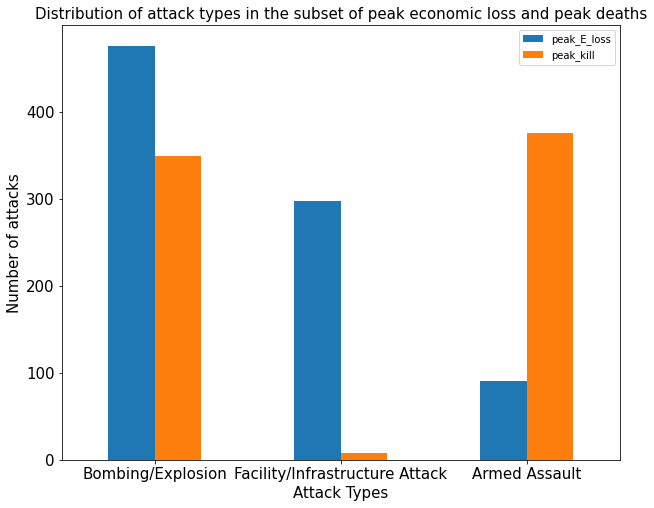

In [330]:
attacktype_prop = Big_propvalue.groupby("attacktype1_txt")['eventid'].count().reset_index(name='peak_E_loss').sort_values(['peak_E_loss'], ascending=False).head(3)
attacktype_kill = Big_nkill.groupby("attacktype1_txt")['eventid'].count().reset_index(name='peak_kill').sort_values(['peak_kill'], ascending=False).head(6)
merged_a_p_k = attacktype_prop.merge(attacktype_kill, how='left', on='attacktype1_txt')
merged_a_p_k
merged_a_p_k.plot(x='attacktype1_txt', kind='bar', stacked=False, rot=0,
                  figsize=(10,8),width=0.5,fontsize=15)
plt.xlabel('Attack Types',fontsize=15)
plt.ylabel('Number of attacks',fontsize=15)
plt.title('Distribution of attack types in the subset of peak economic loss and peak deaths',fontsize=15)

Text(0.5, 1.0, 'Distribution of attack types in the subset of peak economic loss and peak deaths')

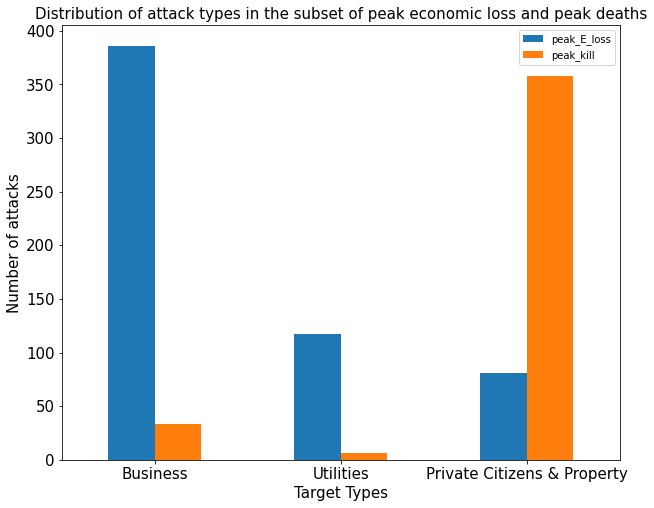

In [337]:
targtype_prop = Big_propvalue.groupby("targtype1_txt")['eventid'].count().reset_index(name='peak_E_loss').sort_values(['peak_E_loss'], ascending=False).head(3)
targtype_kill = Big_nkill.groupby("targtype1_txt")['eventid'].count().reset_index(name='peak_kill').sort_values(['peak_kill'], ascending=False).head(136)
merged_t_p_k = targtype_prop.merge(targtype_kill, how='left', on='targtype1_txt')
merged_t_p_k
merged_t_p_k.plot(x='targtype1_txt', kind='bar', stacked=False, rot=0,
                  figsize=(10,8),width=0.5,fontsize=15)
plt.xlabel('Target Types',fontsize=15)
plt.ylabel('Number of attacks',fontsize=15)
plt.title('Distribution of attack types in the subset of peak economic loss and peak deaths',fontsize=15)

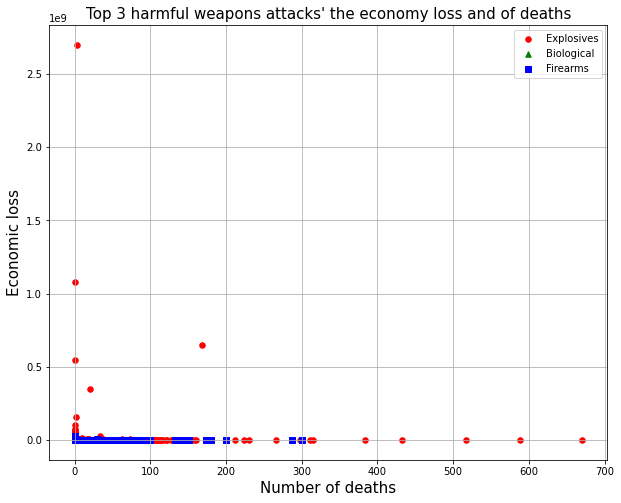

In [372]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Number of deaths', fontsize = 15)
ax.set_ylabel('Economic loss', fontsize = 15)
ax.set_title("Top 3 harmful weapons attacks' the economy loss and of deaths", fontsize = 15)
targets = ['Explosives', 'Biological', 'Firearms']
colors = ['r', 'g', 'b']
markers=['o','^','s']
for target, color, m in zip(targets,colors,markers):
    indicesToKeep = Te["weaptype1_txt"] == target
    plt.scatter(Te.loc[indicesToKeep, 'nkill']
               , Te.loc[indicesToKeep, 'propvalue']
               , c = color
               , s = 30,marker = m)
plt.legend(targets)
plt.grid()

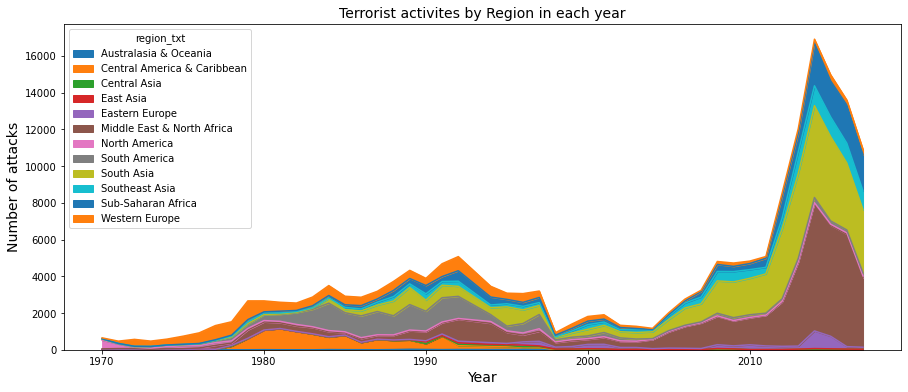

In [363]:
pd.crosstab(Te.iyear,Te.region_txt).plot(kind='area',figsize=(15,6))
plt.title('Terrorist activites by Region in each year',fontsize=14)
plt.ylabel("Number of attacks",fontsize=14)
plt.xlabel("Year",fontsize=14)
plt.show()

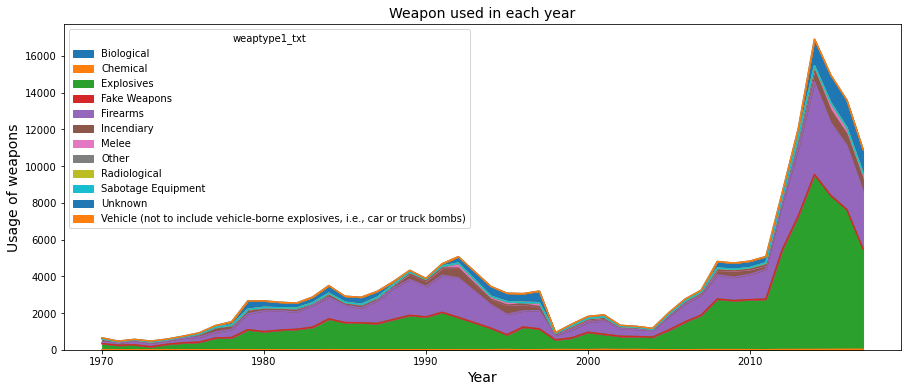

In [366]:
pd.crosstab(Te.iyear,Te.weaptype1_txt).plot(kind='area',figsize=(15,6))
plt.title('Weapon used in each year',fontsize=14)
plt.ylabel("Usage of weapons",fontsize=14)
plt.xlabel("Year",fontsize=14)
plt.show()

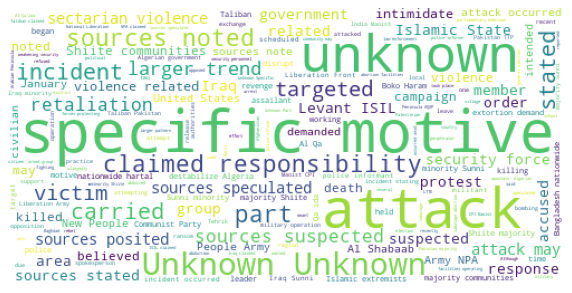

In [419]:
motives=list(Te.motive.dropna(False))
for a in motives:
    a.strip(' ')
    if (a=='Unknown') | (a =='unknown'):
        motives.remove(a)
plt.subplots(figsize=(10,10))
wordcloud= WordCloud(background_color='white', width=500, height = 250).generate(' '.join(motives))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



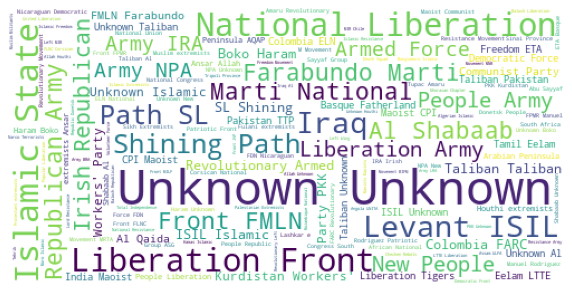

In [416]:
gansters=list(Te.gname.dropna(False))
for a in gansters:
    a.strip(' ')
    if (a=='Unknown') | (a =='unknown'):
        gansters.remove(a)
print(gansters)
plt.subplots(figsize=(10,10))
wordcloud= WordCloud(background_color='white', width=500, height = 250).generate(' '.join(gansters))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()